# Amazon Bestselling Books Analysis
[Source link](https://thecleverprogrammer.com/2020/11/30/amazon-bestselling-books-analysis-with-python/)

The dataset contains 550 books and has been categorized into fiction and non-fiction using Goodreads.

In [1]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')


In [2]:
df = pd.read_csv("data/bestsellers with categories.csv")
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


## Data Preparation

### Check misspelling in Authors name

In [3]:
authors = df["Author"].unique()
authors.sort()
i = 0
for author in authors:
    if i == 3:
        print(author)
        i = 0
    else:
        print(f"{author:35}| ", end="")
        i +=1

Abraham Verghese                   | Adam Gasiewski                     | Adam Mansbach                      | Adir Levy
Admiral William H. McRaven         | Adult Coloring Book Designs        | Alan Moore                         | Alex Michaelides
Alice Schertle                     | Allie Brosh                        | American Psychiatric Association   | American Psychological Association
Amor Towles                        | Amy Ramos                          | Amy Shields                        | Andy Weir
Angie Grace                        | Angie Thomas                       | Ann Voskamp                        | Ann Whitford Paul
Anthony Bourdain                   | Anthony Doerr                      | Atul Gawande                       | Audrey Niffenegger
B. J. Novak                        | Bessel van der Kolk M.D.           | Bill Martin Jr.                    | Bill O'Reilly
Bill Simmons                       | Blue Star Coloring                 | Bob Woodward              

We found 2 misspeling:
- `George R. R. Martin` and `George R.R. Martin`
- `J. K. Rowling` and `J.K. Rowling`

### Correct the auture names

In [4]:
df.loc[df.Author == "J. K. Rowling", "Author"] = "J.K. Rowling"
df.loc[df.Author == "George R. R. Martin", "Author"] = "George R.R. Martin"

In [5]:
df[df.Author == "George R.R. Martin"]

,Name,Author,User Rating,Reviews,Price,Year,Genre
5,A Dance with Dragons (A Song of Ice and Fire),George R.R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R.R. Martin,4.7,19735,30,2014,Fiction
118,Game of Thrones Boxed Set: A Game of Thrones/A...,George R.R. Martin,4.6,5594,5,2011,Fiction
119,Game of Thrones Boxed Set: A Game of Thrones/A...,George R.R. Martin,4.6,5594,5,2012,Fiction
120,Game of Thrones Boxed Set: A Game of Thrones/A...,George R.R. Martin,4.6,5594,5,2013,Fiction


In [6]:
df[df.Author == "J.K. Rowling"]

,Name,Author,User Rating,Reviews,Price,Year,Genre
102,Fantastic Beasts and Where to Find Them: The O...,J.K. Rowling,4.7,4370,15,2016,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,4.0,23973,12,2016,Fiction
155,Harry Potter and the Goblet of Fire: The Illus...,J.K. Rowling,4.9,7758,18,2019,Fiction
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,30,2017,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J.K. Rowling,4.8,13471,52,2016,Fiction
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


In [7]:
df['name_len'] = df['Name'].apply(lambda x: len(x) - x.count(" ")) # subtract whitespaces
punctuations = string.punctuation
print('list of punctuations : ', punctuations)

# percentage of punctuations
def count_punc(text):
    """This function counts the number of punctuations in a text"""
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text) - text.count(" "))*100, 3)

# apply function
df['punc%'] = df['Name'].apply(count_punc)
df

list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,Name,Author,User Rating,Reviews,Price,Year,Genre,name_len,punc%
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,3.846
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,20.000
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,3.125
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,10.000
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,10.169
...,...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,36,5.556
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,71,1.408
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,71,1.408
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,71,1.408


/tmp/ipykernel_25908/3070670067.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


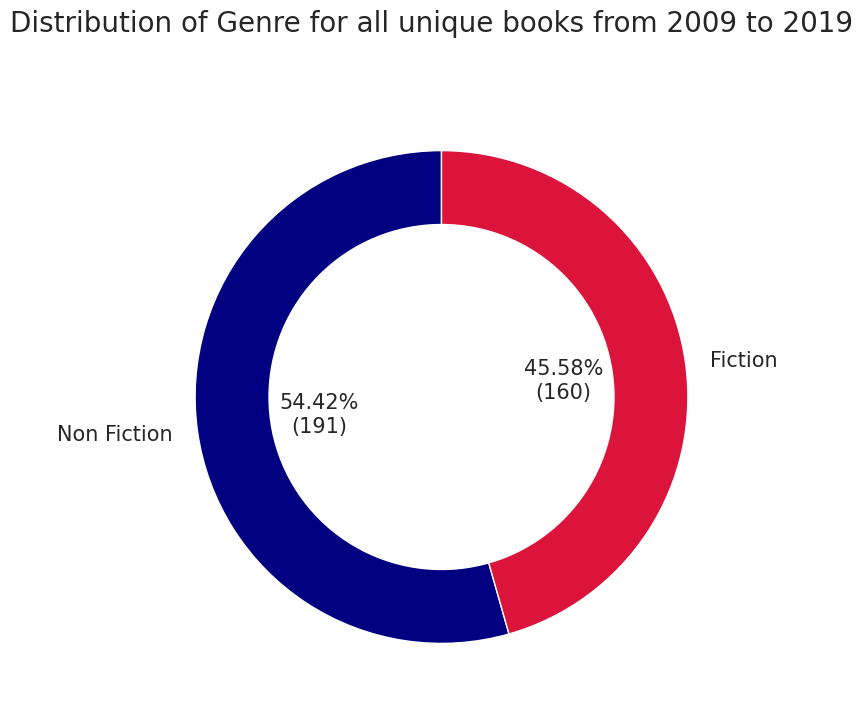

In [8]:
no_dup = df.drop_duplicates('Name')
g_count = no_dup['Genre'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy','crimson']

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values),
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
fig.show()

/tmp/ipykernel_25908/3870980247.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


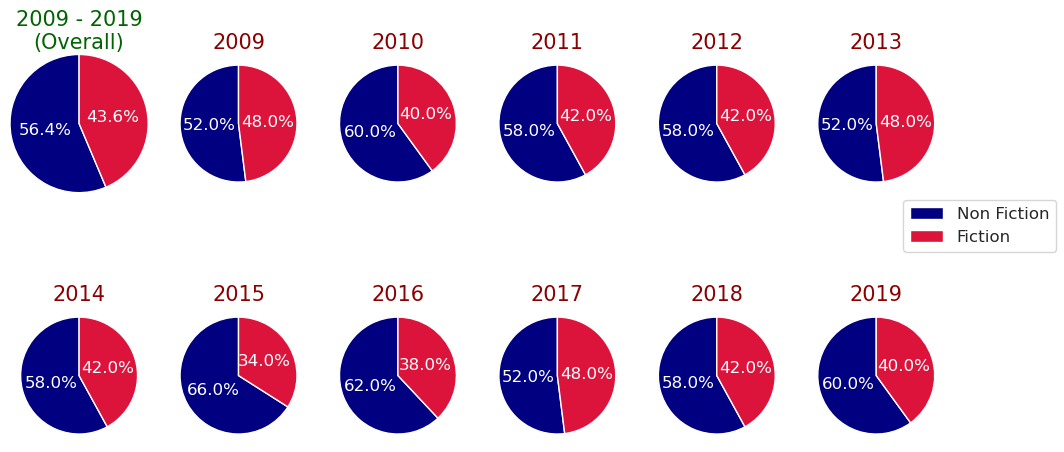

In [9]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
g_count = df['Genre'].value_counts()

fig, ax = plt.subplots(2, 6, figsize=(12,6))

ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 12, 'color': 'white'},
            pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontdict={'fontsize': 15})

for i, year in enumerate(y1):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 15})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%',
                  startangle=90, textprops={'size': 12,'color': 'white'},
                  pctdistance=0.5, colors=genre_col, radius=1.1)

for i, year in enumerate(y2):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%',
                startangle=90, textprops={'size': 12,'color': 'white'},
                pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})

fig.legend(g_count.index, loc='center right', fontsize=12)
fig.show()

/tmp/ipykernel_25908/2335528297.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
/tmp/ipykernel_25908/2335528297.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')


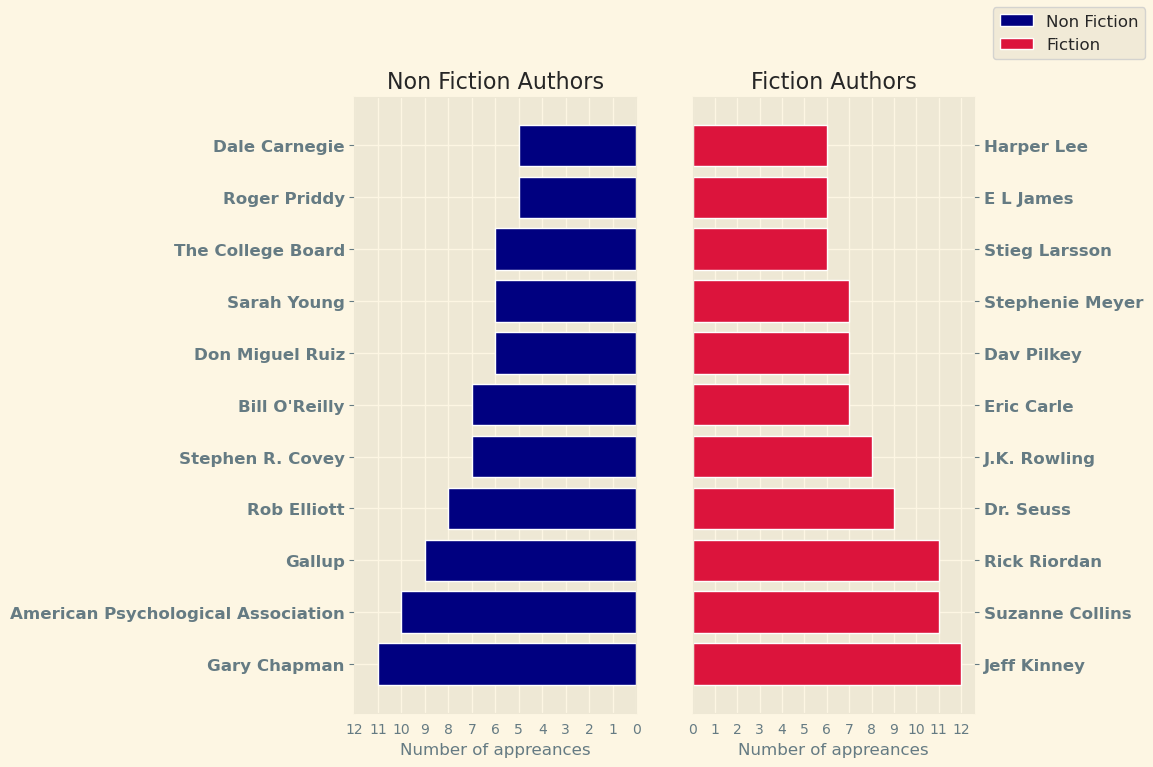

In [10]:
best_nf_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:11]
best_f_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:11]

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(8,8))
    
    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Number of appreances')
    ax[0].set_title('Non Fiction Authors')
    
    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
    ax[1].set_title('Fiction Authors')
    ax[1].set_xlabel('Number of appreances')
    
    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)
    
plt.show()

/tmp/ipykernel_25908/1934722200.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(top_authors.index, fontweight='semibold')


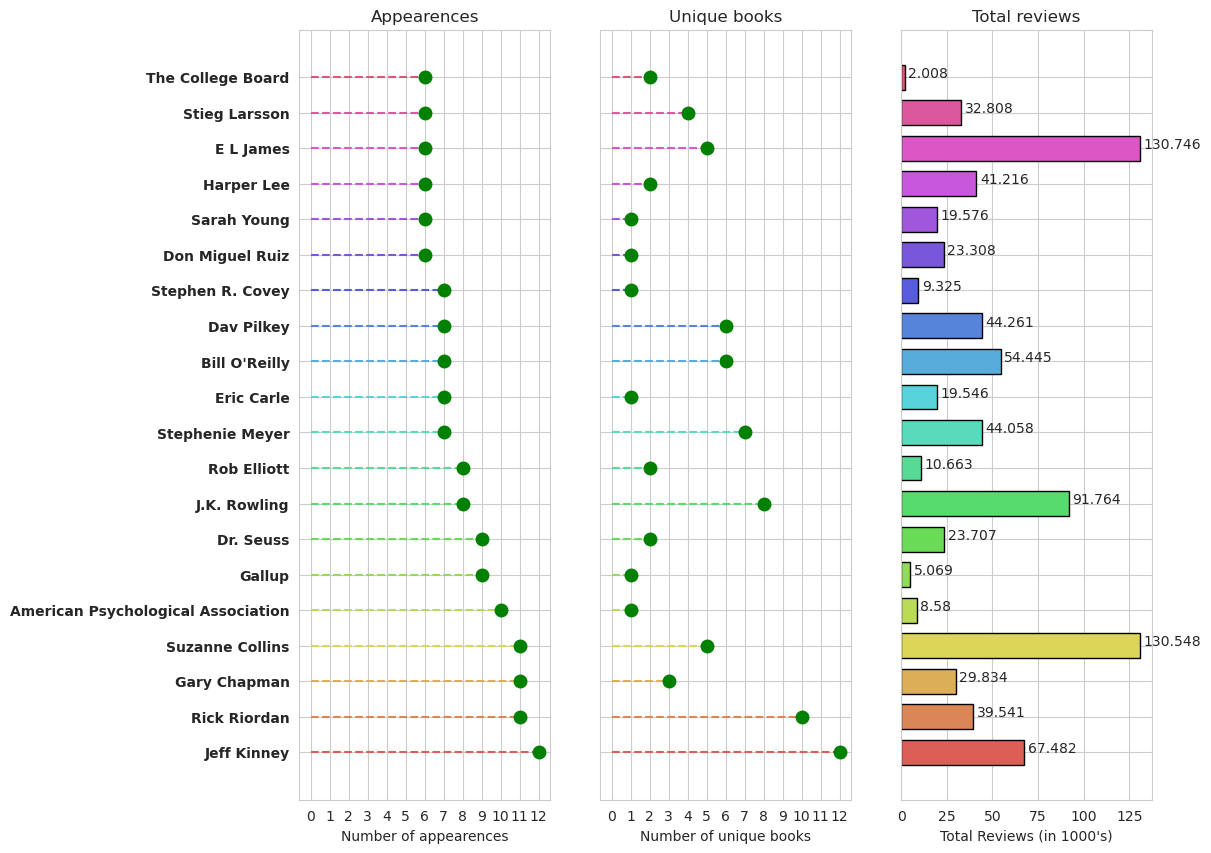

In [11]:
n_best = 20

top_authors = df.Author.value_counts().nlargest(n_best)
no_dup = df.drop_duplicates('Name') # removes all rows with duplicate book names

fig, ax = plt.subplots(1, 3, figsize=(11,10), sharey=True)

color = sns.color_palette("hls", n_best)

ax[0].hlines(y=top_authors.index , xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearences')

book_count = []
total_reviews = []
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)
ax[1].hlines(y=top_authors.index , xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

#plt.suptitle('Top 20 best selling Authors (from 2009 to 2019) details', fontsize=15)
plt.show()